Let's take some article information we have lying around and make a graph to represent the number of articles published over time.  

Tasks:  
Clean data  
Standardize the dates so that Python can read them  
Graph the publication dates into a histogram  

In [1]:
import pandas as pd
import os
import datetime
import csv

In [2]:
#using the built in "read_csv" function to import our data into a pandas object
df = pd.read_csv("Texas_Tribune.csv")

In [3]:
#taking a look at our data
df

,Unnamed: 0,url,outlet,Author,Date,Title,page_num
0,0,https://www.texastribune.org/2018/09/15/donald...,Texas Tribune,PATRICK SVITEK,"SEPT. 15, 2018",Trump endorses Dallas congressman Pete Session...,0
1,1,https://www.texastribune.org/2018/09/13/texas-...,Texas Tribune,ALEX SAMUELS,"SEPT. 13, 2018","With a supermajority, Republicans have complet...",1
2,2,https://www.texastribune.org/2018/09/12/statew...,Texas Tribune,ALEXA URA,"SEPT. 12, 2018",Federal judge upholds Texas' partisan statewid...,2
3,3,https://www.texastribune.org/2018/09/11/democr...,Texas Tribune,ABBY LIVINGSTON,"SEPT. 11, 2018","In the U.S. House, Democrat Henry Cuellar rais...",3
4,4,https://www.texastribune.org/2018/09/08/trump-...,Texas Tribune,JOLIE MCCULLOUGH,"SEPT. 8, 2018",Report: Trump official says U.S. Sen. Ted Cruz...,4
...,...,...,...,...,...,...,...
617,617,https://www.tribtalk.org/2018/10/08/yall-we-ne...,Texas Tribune,Steve Fischer,"By Steve Fischer, Oct. 8, 2018","Y’all, we need a divorce.",617
618,618,https://www.tribtalk.org/2018/10/29/let-texas-...,Texas Tribune,Chip Roy,"By Chip Roy, Oct. 29, 2018",Let Texas be Texas: Unity through Federalism,618
619,619,https://www.texastribune.org/series/uvalde-tex...,Texas Tribune,ALEJANDRO SERRANO,BY ALEJANDRO SERRANO,Uvalde school shooting,619
620,620,https://www.texastribune.org/2022/10/05/texas-...,Texas Tribune,URIEL J. GARCÍA,"OCT. 5, 2022",DACA remains intact as appeals court sends cas...,620


In [4]:
#filtering out unnecessary columns

#using square brackets we can choose one or multiple columns from our date frame
#in this case, we only want to look at a few columns. 
#Arguably, we only need to look at the dates for this project.
df = df[["url","Author", "Title", "Date"]]
df

,url,Author,Title,Date
0,https://www.texastribune.org/2018/09/15/donald...,PATRICK SVITEK,Trump endorses Dallas congressman Pete Session...,"SEPT. 15, 2018"
1,https://www.texastribune.org/2018/09/13/texas-...,ALEX SAMUELS,"With a supermajority, Republicans have complet...","SEPT. 13, 2018"
2,https://www.texastribune.org/2018/09/12/statew...,ALEXA URA,Federal judge upholds Texas' partisan statewid...,"SEPT. 12, 2018"
3,https://www.texastribune.org/2018/09/11/democr...,ABBY LIVINGSTON,"In the U.S. House, Democrat Henry Cuellar rais...","SEPT. 11, 2018"
4,https://www.texastribune.org/2018/09/08/trump-...,JOLIE MCCULLOUGH,Report: Trump official says U.S. Sen. Ted Cruz...,"SEPT. 8, 2018"
...,...,...,...,...
617,https://www.tribtalk.org/2018/10/08/yall-we-ne...,Steve Fischer,"Y’all, we need a divorce.","By Steve Fischer, Oct. 8, 2018"
618,https://www.tribtalk.org/2018/10/29/let-texas-...,Chip Roy,Let Texas be Texas: Unity through Federalism,"By Chip Roy, Oct. 29, 2018"
619,https://www.texastribune.org/series/uvalde-tex...,ALEJANDRO SERRANO,Uvalde school shooting,BY ALEJANDRO SERRANO
620,https://www.texastribune.org/2022/10/05/texas-...,URIEL J. GARCÍA,DACA remains intact as appeals court sends cas...,"OCT. 5, 2022"


In [10]:
#we can use the "list()" function to turn a column into a list
list_of_urls = list(df["url"])
print(list_of_urls[0:10])

['https://www.texastribune.org/2018/09/15/donald-trump-endorses-dallas-congressman-pete-sessions-re-election/', 'https://www.texastribune.org/2018/09/13/texas-senate-republican-supermajority/', 'https://www.texastribune.org/2018/09/12/statewide-judicial-elections-federal-judge-upholds-partisan/', 'https://www.texastribune.org/2018/09/11/democrat-henry-cuellar-fundraising-republican-john-carter/', 'https://www.texastribune.org/2018/09/08/trump-official-ted-cruz-lose-beto-o-rourke/', 'https://www.texastribune.org/2018/09/14/ted-cruz-beto-orourke-agree-3-debates/', 'https://www.texastribune.org/2018/08/31/john-carter-mj-hegar-2018/', 'https://www.texastribune.org/2018/09/08/ted-cruz-beto-orourke-kick-jumpstart-post-labor-day-campaigns-harris-c/', 'https://www.texastribune.org/2018/09/07/will-hurd-gina-ortiz-jones/', 'https://www.texastribune.org/2018/09/06/democrats-dallas-2018-battleground-texas-house/']


In [11]:
#Let's create a list to store our date objects
list(df["Date"])[610:619]

['OCT. 31, 2022',
 'OCT. 27, 2022',
 'OCT. 27, 2022',
 'OCT. 27, 2022',
 'OCT. 29, 2022',
 'OCT. 31, 2022',
 'BY KAREN BROOKS HARPER',
 'By Steve Fischer,  Oct. 8, 2018',
 'By Chip Roy,  Oct. 29, 2018']

As we see, some of the dates don't quite look the same as others. Let's try to standardize them.

In [13]:
#We can use a regular expression known as "regex" 
#to look for this pattern we see in most of the article dates.

import re

#This complex line of code looks for strings formatted like 
#"Jan. 01, 2020" and stores them in an object. 
date_regex = re.compile(
    r"\b(?:jan|feb|mar|apr|may|jun|jul|aug|sept|oct|nov|dec)[.] \d{1,2}, \d{4}\b"
)

#We can now loop through every date in our list and 
#use this regex to add the matched string to a new list of formatted dates.

In [17]:
#create empty list to store our formatted dates
formatted_dates = []

#looping through our dates, looking for this regular expression, and adding it to a list 
for date in list(df["Date"]):
    #in case there are some lines which don't have a date built in, 
    #we can use this "try: except:" line to skip over those lines 
    #so we dont get an error message
    try:
        #we store the matched string to a variable called "date_matched" 
        #from which we can extract the matched text
        date_matched = re.search(date_regex, date.lower())
        
        #This line adds the matched text (date_matched.group(0)) 
        #into our list of formatted dates
        formatted_dates.append(date_matched.group(0))
    except:
        formatted_dates.append("")

Python has a built in package to parse dates and standardize them into a "datetime" object.

In [18]:
import dateutil.parser

#this would be identical to the following for loop:
date_objects = []
for date_object in formatted_dates:
    if date_object == "":
        date_objects.append("")
    else:
        date_objects.append(
            dateutil.parser.parse(date_object)
        )

#lets look at the first few lines of our new list of date objects
date_objects[0:10]

[datetime.datetime(2018, 9, 15, 0, 0),
 datetime.datetime(2018, 9, 13, 0, 0),
 datetime.datetime(2018, 9, 12, 0, 0),
 datetime.datetime(2018, 9, 11, 0, 0),
 datetime.datetime(2018, 9, 8, 0, 0),
 datetime.datetime(2018, 9, 14, 0, 0),
 datetime.datetime(2018, 8, 31, 0, 0),
 datetime.datetime(2018, 9, 8, 0, 0),
 datetime.datetime(2018, 9, 7, 0, 0),
 datetime.datetime(2018, 9, 6, 0, 0)]

In [19]:
print(len(list(df["Date"])))
print(len(date_objects))

622
622


Next, lets look at how many articles were published in each year starting with 2017

In [21]:
#each datetime object has a year, month and day attribute.
#We can loop through each of the dates and keep a count 
#of how many from each year we see

#make sure to build counters outside of the loop 
#or they will be reset after each loop
counter_2017 = 0
counter_2018 = 0
counter_2019 = 0
counter_2020 = 0
counter_2021 = 0
counter_2022 = 0

for date in date_objects:
    if date != "":
        year = date.year
        if year == 2017:
            counter_2017 += 1
        elif year == 2018:
            counter_2018 += 1
        elif year == 2019:
            counter_2019 += 1
        elif year == 2020:
            counter_2020 += 1
        elif year == 2021:
            counter_2021 += 1
        elif year == 2022:
            counter_2022 += 1
        
print('Articles published in 2017: ' + str(counter_2017))
print('Articles published in 2018: ' + str(counter_2018))
print('Articles published in 2019: ' + str(counter_2019))
print('Articles published in 2020: ' + str(counter_2020))
print('Articles published in 2021: ' + str(counter_2021))
print('Articles published in 2022: ' + str(counter_2022))

Articles published in 2017: 0
Articles published in 2018: 270
Articles published in 2019: 0
Articles published in 2020: 0
Articles published in 2021: 0
Articles published in 2022: 319


In [22]:
df["date_clean"] = date_objects
df

c:\users\wilmd\onedrive\desktop\python_env\env\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  """Entry point for launching an IPython kernel.
c:\users\wilmd\onedrive\desktop\python_env\env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,url,Author,Title,Date,date_clean
0,https://www.texastribune.org/2018/09/15/donald...,PATRICK SVITEK,Trump endorses Dallas congressman Pete Session...,"SEPT. 15, 2018",2018-09-15
1,https://www.texastribune.org/2018/09/13/texas-...,ALEX SAMUELS,"With a supermajority, Republicans have complet...","SEPT. 13, 2018",2018-09-13
2,https://www.texastribune.org/2018/09/12/statew...,ALEXA URA,Federal judge upholds Texas' partisan statewid...,"SEPT. 12, 2018",2018-09-12
3,https://www.texastribune.org/2018/09/11/democr...,ABBY LIVINGSTON,"In the U.S. House, Democrat Henry Cuellar rais...","SEPT. 11, 2018",2018-09-11
4,https://www.texastribune.org/2018/09/08/trump-...,JOLIE MCCULLOUGH,Report: Trump official says U.S. Sen. Ted Cruz...,"SEPT. 8, 2018",2018-09-08
...,...,...,...,...,...
617,https://www.tribtalk.org/2018/10/08/yall-we-ne...,Steve Fischer,"Y’all, we need a divorce.","By Steve Fischer, Oct. 8, 2018",2018-10-08
618,https://www.tribtalk.org/2018/10/29/let-texas-...,Chip Roy,Let Texas be Texas: Unity through Federalism,"By Chip Roy, Oct. 29, 2018",2018-10-29
619,https://www.texastribune.org/series/uvalde-tex...,ALEJANDRO SERRANO,Uvalde school shooting,BY ALEJANDRO SERRANO,NaT
620,https://www.texastribune.org/2022/10/05/texas-...,URIEL J. GARCÍA,DACA remains intact as appeals court sends cas...,"OCT. 5, 2022",2022-10-05


In [23]:
df.to_csv('texas_tribune_clean.csv', index=False)

Python has many useful visualization packages such as "matplotlib."  
Let's use that to make our histogram.

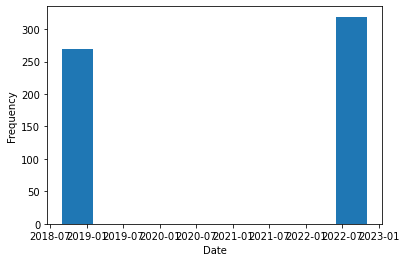

In [28]:
import matplotlib.pyplot as plt

# Create a histogram of the dates using matplotlib
plt.hist(df["date_clean"])

# Add labels to the x and y axes
plt.xlabel("Date")
plt.ylabel("Frequency")

# Show the plot
plt.show()

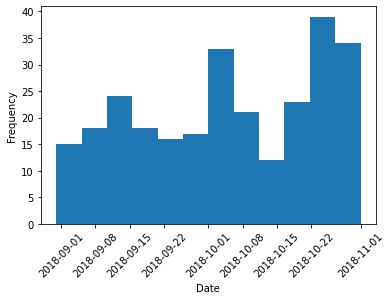

In [34]:
#We can see that this plot is a little cluttered an difficult to read. 
#Let's only look at dates from 2018

import numpy as np

filtered_dates = []
for date in date_objects:
    if date != "" and date.year == 2018:
        filtered_dates.append(date)

# Create a histogram of the dates using matplotlib
plt.hist(filtered_dates, bins=12)

# Add labels to the x and y axes
plt.xlabel("Date")
#we can also rotate the values on the x axis so that they don't overlap with one another
plt.xticks(rotation=45)
plt.ylabel("Frequency")

# Show the plot
plt.show()

In [38]:
df[df["date_clean"].dt.year == 2018].to_csv('texas_tribune_2018_clean.csv', index=False)